### @author: zafar.ahmed
Monte-Carlo based simulation to analyse the portfolio evolution after certain period of time.
CoVariance of each stock in the portfolio is calculate. 
With the help of CoVariance, Corelated returns is populated.
Random weight is also assigned to each stock in the portfolio (this can be changed to specific value).
weight is the fraction of investemt to each stock in the portfolio.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

### Defining get_data function to import stocks data from yfinance using pandas_datareader

In [2]:
def get_data(ticket,start_date,end_date):
    
    stock_data = pdr.get_data_yahoo(ticket,start_date,end_date)
    stock_price = stock_data['Close']
    returns = stock_price.pct_change()
    meanReturn = returns.mean()
    covMatrix = returns.cov()
    return meanReturn, covMatrix, stock_price

### List of stocks in the portfolio

In [3]:
stockList = ['CAMS', 'DMART', 'IRCTC', 'PIIND', 'POLYCAB', 'SUBEXLTD']
stocks = [stock + '.NS' for stock in stockList] # adding .NS after stocks name to import data of stocks from NSE Indian

endDate = dt.datetime.today()
startDate = endDate - dt.timedelta(days=260*2.0)

### Data Analysis to calculate Daily Return, CoVar-Matrix, and stock price

In [4]:
meanReturns, covMatrix, stock_price = get_data(stocks, startDate, endDate)
weights = np.random.random(len(meanReturns)) ## randomly assigning the weight to each stock
weights /= np.sum(weights)

### Monte Carlo Method

In [5]:
mc_sims = 10000 # number of simulations
trading_days = 260*1 #timeframe in days

meanM = np.full(shape=(trading_days, len(weights)), fill_value=meanReturns)
meanM = meanM.T

In [6]:
portfolio_sims = np.full(shape=(trading_days, mc_sims), fill_value=0.0)
initialPortfolio = 100

In [7]:
for m in range(0, mc_sims):
    Z = np.random.normal(size=(trading_days, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L,Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

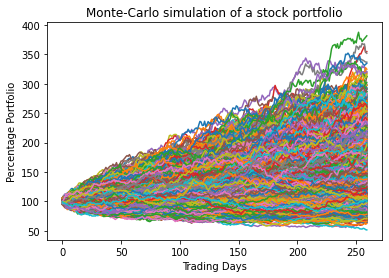

In [8]:
plt.plot(portfolio_sims)
plt.ylabel('Percentage Portfolio')
plt.xlabel('Trading Days')
plt.title('Monte-Carlo simulation of a stock portfolio')
plt.show()

In [9]:
print(f'Maximum portfolio value can reach after {trading_days} trading days : {np.round(portfolio_sims.max(),2)} with investment of {initialPortfolio}')
print(f'Minimum portfolio value can reach after {trading_days} trading days : {np.round(portfolio_sims.min(),2)} with investment of {initialPortfolio}')

Maximum portfolio value can reach after 260 trading days : 387.38 with investment of 100
Minimum portfolio value can reach after 260 trading days : 51.55 with investment of 100
